# Sistema de Recomendación de Cultivos
## Entrega 1: EDA completo

**Machine Learning**

**Profesor:** Marco Terán  
**Fecha:** 2025/09/30

**Integrantes**

- Daniel Alejandro Garcia Zuluaica
- Edward Alejandro Rayo Cortés
- Elizabeth Toro Chalarca

___

## 📋 Tabla de Contenidos

1. **Configuración del entorno**
2. **Comprensión del Negocio**
3. **Obtención y Comprensión de Datos**
4. **Análisis Exploratorio (EDA)**

---

In [1]:
print("¡Bienvenidos al primer notebook!")

¡Bienvenidos al primer notebook!


---

## 1. Configuración del Entorno

### ¿Por qué importan las versiones?

En ML, la reproducibilidad es crucial. Imagina que tu modelo funciona perfectamente en tu computadora pero falla en producción. La causa más común: diferentes versiones de librerías.

**Regla de oro**: Siempre documenta y verifica las versiones de tus dependencias.

### Librerías que usaremos

- **NumPy**: El motor matemático de Python. Maneja arrays y operaciones numéricas eficientemente
- **Pandas**: Como Excel con superpoderes. Organiza datos en DataFrames (tablas)
- **Matplotlib/Seaborn**: Nuestros artistas. Crean visualizaciones profesionales
- **Scikit-learn**: La navaja suiza del ML. Contiene algoritmos, métricas y utilidades

### Configuración visual

Los defaults de matplotlib no son los más bonitos. Vamos a configurar:
- Estilo consistente para todos los gráficos
- Tamaños legibles
- Colores agradables
- Formato de números apropiado

In [2]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.12 instalado correctamente


## Importando Librerias

Descargarems las librerias necesarias para utilizar el modelo, esto solo se ejecuta una vez

In [3]:
pip install -r ../requirements.txt

  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached Automat-20.2.0-py2.py3-none-any.whl.metadata (17 kB)
  Using cached bcrypt-3.2.0-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (7.5 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2020.6.20-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached click-8.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl.metadata (14 kB)
  Using cached configobj-5.0.6.tar.gz (33 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached constantly-15.1.0-py2.py3-none

### Validación de librerias

Se verifica que las librerias que vamos a usar estén completamente descargadas


- **NumPy**
- **Pandas**
- **Matplotlib/Seaborn**
- **Scikit-learn**

In [4]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


#### Verificar versiones de librerías críticas
Se valida que tengamos la versión mínima de las librerias

In [5]:

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "Requiere scikit-learn >= 1.0.1"
print(f"✅ scikit-learn {sklearn.__version__} instalado")

✅ scikit-learn 1.7.2 instalado


## 💼 2. Fase 1: Comprensión del Negocio <a name="business_understanding"></a>

### El problema de seleccionar un cultivo invalido

**Contexto**: Imagina que eres un agricultor y quieres determinar cuál sería el mejor cultivo para sembrar sin verte afectado por factores de perdidas económicas, mal uso de los recursos y/o degradaciones ambientales.

La agricultura es fundamental para la seguridad alimentaria y el desarrollo económico. Los agricultores a menudo enfrentan desafíos al seleccionar el cultivo adecuado 
para su tierra según las condiciones del suelo y el ambiente. Una mala selección de cultivos puede llevar a:
 
**Problema actual**:
- Rendimientos reducidos
- Pérdidas económicas
- Uso ineficiente de recursos
- Degradación ambiental


**Solución propuesta**: Encontrar los parámetros y modelo que mejor se adapten para predecir el cultivo más adecuado para cultivar basándose en nutrientes del suelo y parámetros agroclimáticos.

### Definiendo el éxito

* **Métrica de negocio**: 

* **Métrica técnica**: Error Absoluto Medio (MAE) < 

* **¿Por qué ?**

### Preguntas críticas antes de empezar

**1. ¿Realmente necesitamos ML?**

**2. ¿Qué pasa si el modelo falla?**

**3. ¿Cómo mediremos el impacto?**


---

## 3. Fase 2: Obtención y Comprensión de Datos <a name="data_understanding"></a>

### El dataset para Recomendación de Cultivos

**Origen**: Conjunto de Datos para Recomendación de Cultivos  
**Tamaño**: 2,200 muestras  
**Granularidad**: Cada fila representa una muestra con el cultivo recomendado en función de la composición del suelo y las condiciones climáticas.

### ¿Por qué este dataset?

- **Clásico en ML**: Bien estudiado, podemos comparar resultados
- **Tamaño apropiado**: Ni muy pequeño ni muy grande para aprender
- **Múltiples tipos de datos**: Numéricos y categóricos

### Estrategia de descarga robusta

Implementaremos:
1. **Caché local**: Si ya descargamos, no repetir
2. **Manejo de errores**: Si falla la descarga, informar claramente
3. **Estructura organizada**: Carpeta datasets/ para todos los datos

In [6]:
#importar funciones utilitarias implementads en el directorio src
import sys
sys.path.append('../src')

### Descarga y Carga de Datos

In [7]:
# Función para descargar datos
import importlib
import data_loader
importlib.reload(data_loader)

from data_loader import load_crop_data

crop_data = load_crop_data()
print(crop_data.head())

📁 Cargando datos desde caché local: Crop_recommendation.csv
    N   P   K  temperature  humidity   ph  rainfall label
0  90  42  43        20.88     82.00 6.50    202.94  rice
1  85  58  41        21.77     80.32 7.04    226.66  rice
2  60  55  44        23.00     82.32 7.84    263.96  rice
3  74  35  40        26.49     80.16 6.98    242.86  rice
4  78  42  42        20.13     81.60 7.63    262.72  rice


### 🔍 Análisis Exploratorio de Datos (EDA)

#### ¿Qué es EDA y por qué es crucial?

**EDA es como ser un detective**: Buscas pistas, anomalías y patrones en los datos.

**John Tukey** (inventor del EDA) dijo: "Es mejor una respuesta aproximada a la pregunta correcta que una respuesta exacta a la pregunta incorrecta."

#### Primera impresión: Vista rápida

**¿Qué buscamos?**
- Tipos de datos (numéricos, texto, fechas)
- Dimensiones (filas × columnas)
- Valores faltantes obvios
- Rangos sospechosos

**Herramientas**: head(), info(), describe()

### Primera Inspección de Datos

In [8]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con formato mejorado
display(crop_data.head().style.background_gradient(cmap='coolwarm', subset=['temperature', 'humidity', 'ph', 'rainfall']))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
crop_data.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(crop_data.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

                           ESTADÍSTICAS DESCRIPTIVAS                            


,count,mean,std,min,25%,50%,75%,max
N,2200.00,50.55,36.92,0.00,21.00,37.00,84.25,140.00
P,2200.00,53.36,32.99,5.00,28.00,51.00,68.00,145.00
K,2200.00,48.15,50.65,5.00,20.00,32.00,49.00,205.00
temperature,2200.00,25.62,5.06,8.83,22.77,25.60,28.56,43.68
humidity,2200.00,71.48,22.26,14.26,60.26,80.47,89.95,99.98
ph,2200.00,6.47,0.77,3.50,5.97,6.43,6.92,9.94
rainfall,2200.00,103.46,54.96,20.21,64.55,94.87,124.27,298.56


### Descripción de Variables

### Entendiendo cada variable


In [9]:
# Diccionario de metadatos
metadata = {
    'Variable': ['Nitrogeno (N)','P','k','Temperature','Humidity','PH','Rainfall','label'],
    'Tipo': ['Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica', 
             'Numérica', 'Numérica', 'Categórica (target)'],
    'Descripción': [
        'Cantidad de nitrogeno en el suelo(***)',
        'Cantidad de fosforo en el suelo (más norte = mayor valor)',
        'Cantidad de potacio en el suelo (años)',
        'Temperatura en grados celsius',
        'Porcentaje de humedad relativa',
        'Valor del pH del suelo (0-14 escala cerca al cero más ácido)',
        'Precipitación en mm',
        'Tipo de cultivo recomendado',
    ],
    'Valores Faltantes': [
        crop_data['N'].isnull().sum(),
        crop_data['P'].isnull().sum(),
        crop_data['K'].isnull().sum(),
        crop_data['temperature'].isnull().sum(),
        crop_data['humidity'].isnull().sum(),
        crop_data['ph'].isnull().sum(),
        crop_data['rainfall'].isnull().sum(),
        crop_data['label'].isnull().sum(),
    ]
}

df_metadata = pd.DataFrame(metadata)
display(df_metadata.style.map(
    lambda x: 'background-color: #ffcccc' if x > 0 else '', 
    subset=['Valores Faltantes']
))

,Variable,Tipo,Descripción,Valores Faltantes
0,Nitrogeno (N),Numérica,Cantidad de nitrogeno en el suelo(***),0
1,P,Numérica,Cantidad de fosforo en el suelo (más norte = mayor valor),0
2,k,Numérica,Cantidad de potacio en el suelo (años),0
3,Temperature,Numérica,Temperatura en grados celsius,0
4,Humidity,Numérica,Porcentaje de humedad relativa,0
5,PH,Numérica,Valor del pH del suelo (0-14 escala cerca al cero más ácido),0
6,Rainfall,Numérica,Precipitación en mm,0
7,label,Categórica (target),Tipo de cultivo recomendado,0


---
### Detectando problemas en los datos

#### Análisis de Valores Faltantes (Missing values)


In [10]:
# Análisis detallado de valores faltantes
def analyze_missing_values(df):
    """Análisis completo de valores faltantes"""
    missing_df = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Faltantes': df.isnull().sum(),
        'Porcentaje': (df.isnull().sum() / len(df)) * 100,
        'Tipo_Dato': df.dtypes
    })
    
    missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values(
        'Porcentaje', ascending=False
    )
    
    if len(missing_df) > 0:
        # Visualización
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gráfico de barras
        ax1.bar(missing_df['Columna'], missing_df['Porcentaje'], color='coral')
        ax1.set_xlabel('Columna')
        ax1.set_ylabel('Porcentaje de Valores Faltantes (%)')
        ax1.set_title('Valores Faltantes por Columna')
        ax1.axhline(y=5, color='r', linestyle='--', label='Umbral 5%')
        ax1.legend()
        
        # Heatmap de patrones
        import seaborn as sns
        msno_data = df[missing_df['Columna'].tolist()].isnull().astype(int)
        sns.heatmap(msno_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
                   ax=ax2, vmin=-1, vmax=1)
        ax2.set_title('Correlación de Patrones de Valores Faltantes')
        
        plt.tight_layout()
        plt.show()
        
        return missing_df
    else:
        print("✅ No hay valores faltantes en el dataset")
        return None

missing_analysis = analyze_missing_values(housing)
if missing_analysis is not None:
    display(missing_analysis)

NameError: name 'housing' is not defined

### Estadísticas descriptivas: Los números cuentan historias

**¿Qué nos dicen las estadísticas?**

**Media vs Mediana**:
- Si media > mediana: Sesgo a la derecha (valores extremos altos)
- Si media < mediana: Sesgo a la izquierda (valores extremos bajos)
- Si media ≈ mediana: Distribución simétrica

**Desviación estándar**:
- Alta: Mucha variabilidad (cuidado con outliers)
- Baja: Datos concentrados (posible poca información)

**Min/Max sospechosos**:
- Edad máxima = 52: ¿Censura de datos?
- Precio máximo = $500,001: Definitivamente censura

### Análisis Univariado

**¿Qué buscamos en un histograma?**

1. **Forma de campana** (normal): Ideal para muchos algoritmos
2. **Sesgo** (cola larga): Considerar transformación logarítmica
3. **Bimodal** (dos jorobas): Posibles subgrupos diferentes
4. **Uniforme** (plano): Poca información predictiva
5. **Picos extraños**: Valores artificiales o errores

**Ejemplo**: median_house_value tiene pico en $500k → Censura de datos


In [ ]:
# Función para análisis univariado robusto
def univariate_analysis(df, column, target=None):
    """Análisis univariado con estadísticas robustas"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Histograma con KDE
    ax1 = axes[0, 0]
    df[column].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax1)
    ax1.axvline(df[column].mean(), color='red', linestyle='--', label=f'Media: {df[column].mean():.2f}')
    ax1.axvline(df[column].median(), color='green', linestyle='--', label=f'Mediana: {df[column].median():.2f}')
    ax1.set_title(f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Boxplot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(df[column].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'Boxplot de {column}')
    ax2.set_ylabel(column)
    ax2.grid(alpha=0.3)
    
    # Detectar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    ax2.text(1.1, Q3, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)', 
             fontsize=10)
    
    # 3. Q-Q Plot
    ax3 = axes[1, 0]
    from scipy import stats
    stats.probplot(df[column].dropna(), dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(alpha=0.3)
    
    # 4. Relación con target (si existe)
    ax4 = axes[1, 1]
    if target is not None and target in df.columns:
        ax4.scatter(df[column], df[target], alpha=0.5, s=10)
        ax4.set_xlabel(column)
        ax4.set_ylabel(target)
        ax4.set_title(f'{column} vs {target}')
        
        # Agregar línea de tendencia
        z = np.polyfit(df[column].dropna(), df[target][df[column].notna()], 1)
        p = np.poly1d(z)
        ax4.plot(df[column].sort_values(), p(df[column].sort_values()), 
                "r--", alpha=0.8, label=f'Tendencia')
        
        # Calcular correlación
        corr = df[column].corr(df[target])
        ax4.text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                transform=ax4.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
        ax4.legend()
    else:
        # Estadísticas adicionales
        ax4.axis('off')
        stats_text = f"""
        Estadísticas Robustas:
        
        • Media: {df[column].mean():.2f}
        • Mediana: {df[column].median():.2f}
        • Desv. Estándar: {df[column].std():.2f}
        • MAD: {stats.median_abs_deviation(df[column].dropna()):.2f}
        • Asimetría: {df[column].skew():.2f}
        • Curtosis: {df[column].kurtosis():.2f}
        • Rango: [{df[column].min():.2f}, {df[column].max():.2f}]
        • IQR: {IQR:.2f}
        • CV: {df[column].std()/df[column].mean():.2f}
        """
        ax4.text(0.1, 0.5, stats_text, transform=ax4.transAxes, 
                fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
    
    ax4.grid(alpha=0.3)
    
    plt.suptitle(f'Análisis Univariado: {column}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analizar variables numéricas clave
for col in ['median_income', 'housing_median_age', 'median_house_value']:
    univariate_analysis(housing, col, 'median_house_value')

### Análisis de Variable Categórica

In [ ]:
# Análisis de ocean_proximity
def analyze_categorical(df, cat_col, target_col):
    """Análisis completo de variable categórica"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Distribución de categorías
    ax1 = axes[0, 0]
    counts = df[cat_col].value_counts()
    ax1.bar(counts.index, counts.values, color=plt.cm.Set3(range(len(counts))))
    ax1.set_title(f'Distribución de {cat_col}')
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)
    
    # Agregar porcentajes
    for i, (idx, val) in enumerate(counts.items()):
        ax1.text(i, val, f'{val}\n({val/len(df)*100:.1f}%)', 
                ha='center', va='bottom')
    
    # 2. Pie chart
    ax2 = axes[0, 1]
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(range(len(counts))))
    ax2.set_title(f'Proporción de {cat_col}')
    
    # 3. Boxplot por categoría
    ax3 = axes[1, 0]
    df.boxplot(column=target_col, by=cat_col, ax=ax3)
    ax3.set_title(f'{target_col} por {cat_col}')
    ax3.set_xlabel(cat_col)
    ax3.set_ylabel(target_col)
    plt.sca(ax3)
    plt.xticks(rotation=45)
    
    # 4. Estadísticas por categoría
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    stats_by_cat = df.groupby(cat_col)[target_col].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    table_data = []
    for idx, row in stats_by_cat.iterrows():
        table_data.append([idx, f"{row['count']:.0f}", 
                          f"${row['mean']:,.0f}", 
                          f"${row['median']:,.0f}",
                          f"${row['std']:,.0f}"])
    
    table = ax4.table(cellText=table_data,
                     colLabels=['Categoría', 'N', 'Media', 'Mediana', 'Desv.Est.'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.3, 0.15, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Colorear encabezados
    for i in range(5):
        table[(0, i)].set_facecolor('#40E0D0')
        table[(0, i)].set_text_props(weight='bold')
    
    plt.suptitle(f'Análisis de Variable Categórica: {cat_col}', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_categorical(housing, 'ocean_proximity', 'median_house_value')

### Análisis Geoespacial

**Mapas geográficos:** Location, location, location

**¿Por qué graficar geográficamente?**
- Precios inmobiliarios son altamente locales
- Revelamos clusters (Silicon Valley, LA, San Diego)
- Detectamos anomalías geográficas

**Técnicas**:
- Scatter plot simple: Ver forma de California
- Color por precio: Zonas caras vs baratas
- Tamaño por población: Densidad urbana


In [ ]:
# Visualización geográfica mejorada
def plot_geographical_data(df):
    """Visualización geográfica de California con precios"""
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    # 1. Mapa de densidad
    ax1 = axes[0]
    ax1.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, c='blue')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax1.set_title('Densidad de Puntos de Datos')
    ax1.grid(True, alpha=0.3)
    
    # 2. Mapa de precios
    ax2 = axes[1]
    scatter = ax2.scatter(df['longitude'], df['latitude'], 
                         c=df['median_house_value'], cmap='YlOrRd',
                         s=df['population']/100, alpha=0.4)
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')
    ax2.set_title('Precio Medio de Vivienda por Ubicación\n(Tamaño = Población)')
    plt.colorbar(scatter, ax=ax2, label='Precio Medio ($)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Mapa de ingresos
    ax3 = axes[2]
    scatter2 = ax3.scatter(df['longitude'], df['latitude'],
                          c=df['median_income'], cmap='viridis',
                          s=20, alpha=0.4)
    ax3.set_xlabel('Longitud')
    ax3.set_ylabel('Latitud')
    ax3.set_title('Ingreso Medio por Ubicación')
    plt.colorbar(scatter2, ax=ax3, label='Ingreso Medio (×$10k)')
    ax3.grid(True, alpha=0.3)
    
    # Identificar zonas de alto valor
    high_value = df[df['median_house_value'] > df['median_house_value'].quantile(0.9)]
    for ax in axes[1:]:
        ax.scatter(high_value['longitude'], high_value['latitude'],
                  color='red', s=100, alpha=0.5, marker='*',
                  label='Top 10% Precio')
        ax.legend()
    
    plt.suptitle('Análisis Geoespacial de California Housing', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por región
    print("\n📍 Estadísticas por Proximidad al Océano:")
    print("=" * 60)
    stats = df.groupby('ocean_proximity').agg({
        'median_house_value': ['mean', 'median', 'std'],
        'median_income': 'mean',
        'population': 'sum'
    }).round(2)
    display(stats)

plot_geographical_data(housing)

#### Matriz de correlación: Relaciones entre variables

**Correlación de Pearson**:
- Mide relación **lineal** entre variables
- Rango: [-1, +1]
- 0 = Sin relación lineal (¡pero puede haber no-lineal!)

**Interpretación**:
- |r| < 0.1: Muy débil
- 0.1 ≤ |r| < 0.3: Débil
- 0.3 ≤ |r| < 0.5: Moderada
- 0.5 ≤ |r| < 0.7: Fuerte
- |r| ≥ 0.7: Muy fuerte

**Cuidado**: Correlación ≠ Causalidad

📊 Análisis de correlación (heatmaps + barras) guardado en: plots/correlation_analysis_multimetric.png


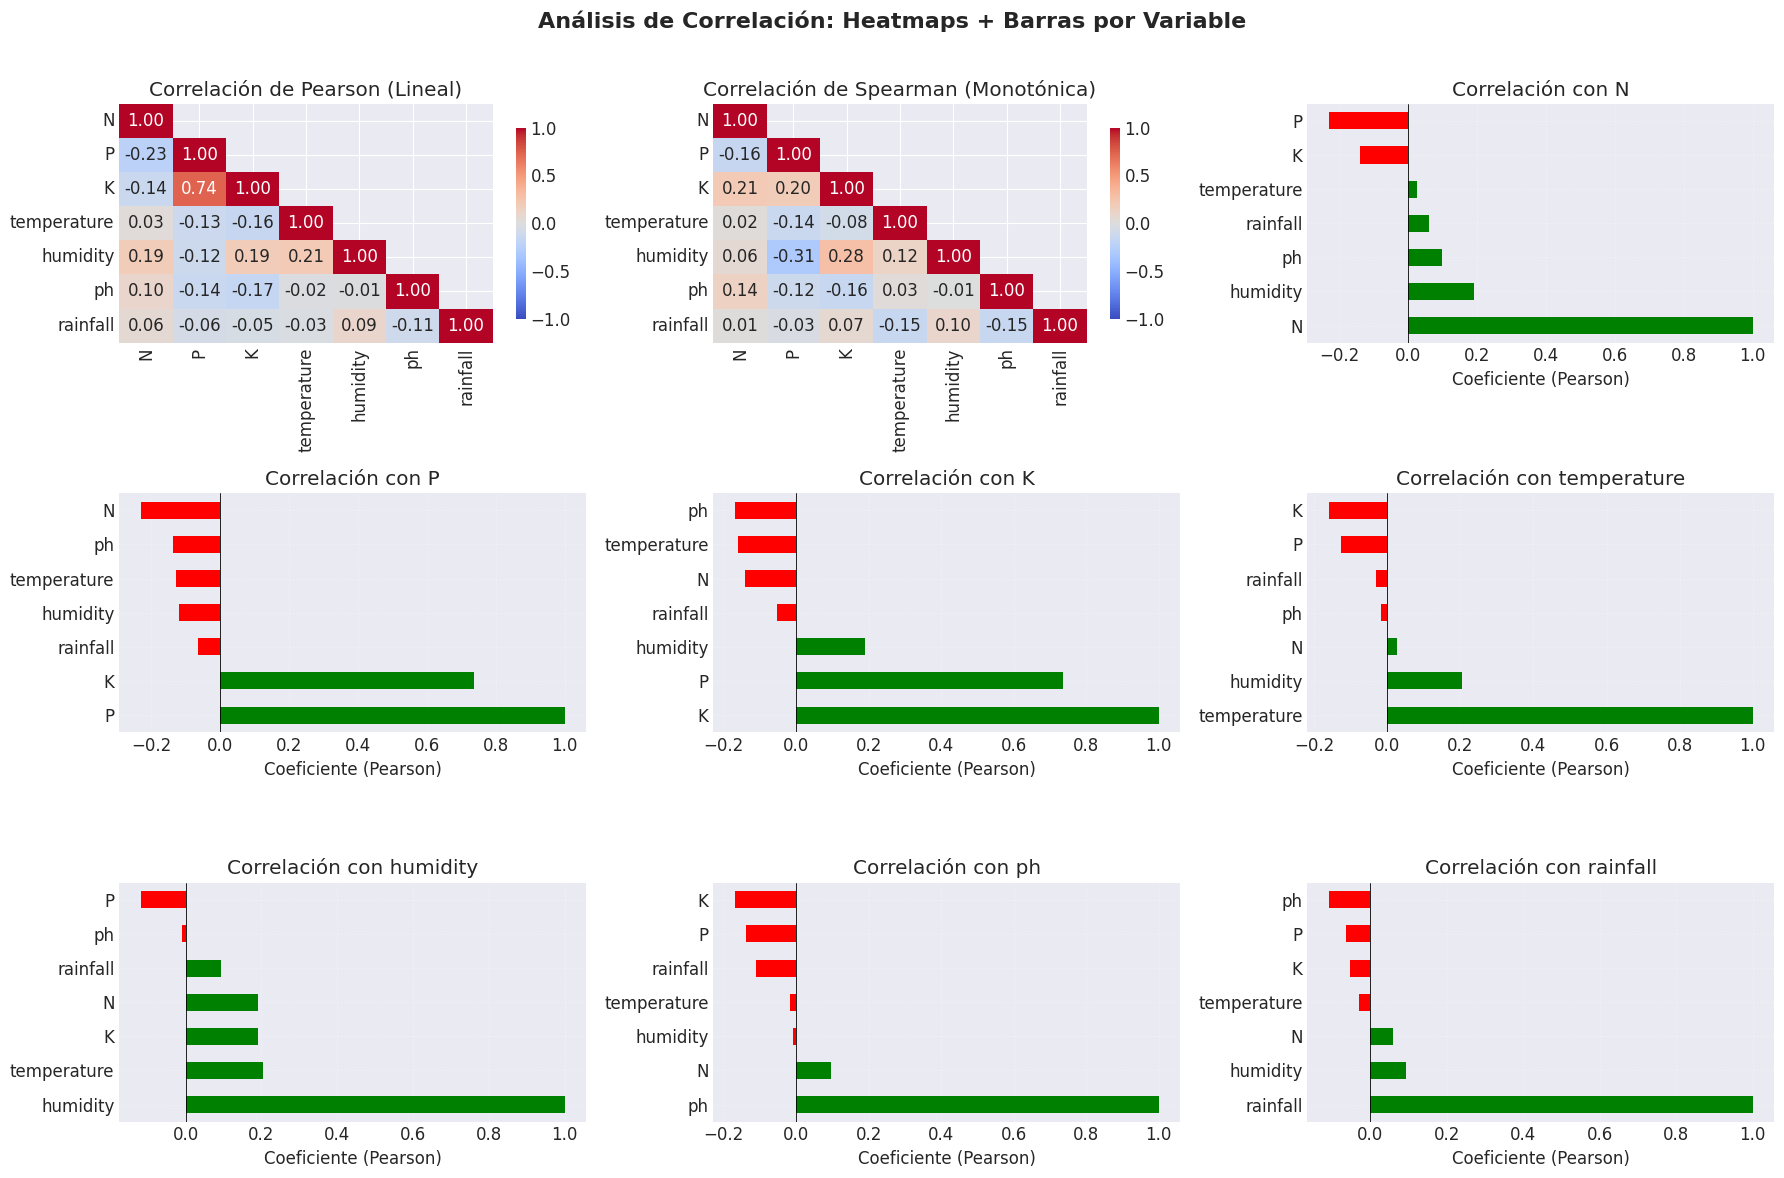


🔗 Todas las correlaciones (Pearson) entre pares de variables:
Variable A      Variable B             r  Fuerza  Dirección
----------------------------------------------------------------------
N               P                 -0.231  Débil      Negativa
N               K                 -0.141  Débil      Negativa
N               temperature       +0.027  Muy Débil  Positiva
N               humidity          +0.191  Débil      Positiva
N               ph                +0.097  Muy Débil  Positiva
N               rainfall          +0.059  Muy Débil  Positiva
P               K                 +0.736  Muy Fuerte Positiva
P               temperature       -0.128  Débil      Negativa
P               humidity          -0.119  Débil      Negativa
P               ph                -0.138  Débil      Negativa
P               rainfall          -0.064  Muy Débil  Negativa
K               temperature       -0.160  Débil      Negativa
K               humidity          +0.191  Débil      Positiva


In [11]:
# Análisis de correlación mejorado
from correlation_analysis import correlation_analysis

correlation_analysis(crop_data)

### Interpretación de las Correlaciones

**Relación destacada y única:**
- P – K = **+0.736** → correlación muy fuerte y positiva. Sugiere posible multicolinealidad (nutrientes del suelo afectados por prácticas de fertilización similares o composición edáfica compartida).

**Relación secundaria (N – K):**
- Nitrogeno – Potasio muestra la segunda correlación más alta del conjunto pero permanece dentro del rango débil (|r| ≤ 0.231). Esto indica que NO hay una dependencia lineal fuerte entre ambos; podría reflejar prácticas de abonado combinadas o un gradiente edáfico suave, pero no alcanza niveles de preocupación por multicolinealidad. No requiere acciones de reducción (p.ej. eliminación, PCA) y en modelos lineales bastaría con regularización estándar.

**Resto de correlaciones:**
- Todas las demás están en rangos débiles o muy débiles (|r| ≤ 0.231) → baja redundancia lineal entre la mayoría de variables numéricas.

**Clima entre sí:**
- temperature – humidity = **+0.205** (débil). Plausible por co‐variación estacional / regional (más calor asociado a cierta retención de humedad en algunas zonas), pero no es determinante.

**Patrones suaves adicionales:**
- ph – rainfall = **−0.109**: ligera tendencia a menor pH (más ácido) con más lluvia; magnitud pequeña que sugiere efectos de lixiviación/acidificación leves.

**Conclusión práctica:**
- Salvo el binomio P–K, no existen dependencias lineales fuertes. Para un sistema de recomendación de cultivo (variable objetivo categórica) la señal predictiva probablemente provendrá de:
  1. Interacciones no lineales entre nutrientes y clima.
  2. Patrones multivariados más sutiles (combinaciones de N, P, K con pH y humedad).
  3. Posible importancia de variables individuales sin redundancia (baja colinealidad = modelo más estable).

**Implicación para modelado:**
- Modelos lineales podrían incluir regularización para manejar la multicolinealidad P–K.
- Árboles / ensembles (Random Forest, Gradient Boosting) capturarán interacciones sin requerir ingeniería pesada.
- Considerar verificar VIF solo para nutrientes si se usa un modelo lineal.

> En resumen: estructura de correlación limpia y parsimoniosa; no se requiere fuerte reducción por colinealidad, excepto vigilar el par P–K y monitorizar N–K si se añadieran nuevas fuentes de datos o más variables de suelo.

### Detección de Anomalías y Outliers

**Outliers:** ¿Errores o información valiosa?

**Tipos de outliers**:
1. **Errores**: Edad = 999 años → Eliminar
2. **Casos raros pero válidos**: Mansión de $50M → Mantener
3. **Diferentes poblaciones**: Empresa en zona residencial → Investigar

**Métodos de detección**:
- **IQR**: Fuera de Q1-1.5×IQR o Q3+1.5×IQR
- **Z-score**: |z| > 3
- **Isolation Forest**: Algoritmo de ML para anomalías

#### Distribuciones problemáticas

**Alta asimetría (skewness)**:
- Problema: Muchos algoritmos asumen normalidad
- Solución: Transformación log, sqrt o Box-Cox

**Alta curtosis**:
- Problema: Colas pesadas, muchos outliers
- Solución: Winsorization (cap de valores extremos)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def detect_outliers(df):
    """Detección de outliers usando múltiples métodos"""
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Método 1: IQR
    outliers_iqr = pd.DataFrame()
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((numeric_df[col] < Q1 - 1.5 * IQR) | 
                   (numeric_df[col] > Q3 + 1.5 * IQR))
        outliers_iqr[col] = outliers
    
    # Método 2: Z-Score
    from scipy import stats
    z_scores = np.abs(stats.zscore(numeric_df.fillna(numeric_df.median())))
    outliers_zscore = (z_scores > 3)
    
    # Método 3: Isolation Forest
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df.fillna(numeric_df.median()))
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers_iso = iso_forest.fit_predict(scaled_data) == -1
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Outliers por columna (IQR)
    ax1 = axes[0, 0]
    outlier_counts = outliers_iqr.sum()
    ax1.bar(range(len(outlier_counts)), outlier_counts.values)
    ax1.set_xticks(range(len(outlier_counts)))
    ax1.set_xticklabels(outlier_counts.index, rotation=45, ha='right')
    ax1.set_title('Outliers por Variable (Método IQR)')
    ax1.set_ylabel('Número de Outliers')
    
    # Plot 2: Distribución de outliers por método
    ax2 = axes[0, 1]
    methods_comparison = pd.DataFrame({
        'IQR': outliers_iqr.any(axis=1).sum(),
        'Z-Score': outliers_zscore.any(axis=1).sum(),
        'Isolation Forest': outliers_iso.sum()
    }, index=['Outliers'])
    methods_comparison.T.plot(kind='bar', ax=ax2, legend=False)
    ax2.set_title('Comparación de Métodos de Detección')
    ax2.set_ylabel('Número de Outliers Detectados')
    ax2.set_xlabel('Método')
    
    # Plot 3: Heatmap de outliers
    ax3 = axes[1, 0]
    sample_outliers = outliers_iqr.head(100)
    sns.heatmap(sample_outliers.T, cmap='RdYlBu_r', cbar=False, ax=ax3,
               yticklabels=True, xticklabels=False)
    ax3.set_title('Mapa de Outliers (Primeras 100 filas)')
    ax3.set_xlabel('Observaciones')
    
    # Plot 4: Resumen estadístico
    ax4 = axes[1, 1]
    ax4.axis('off')
    summary_text = f"""
    Resumen de Detección de Anomalías:
    
    • Total de observaciones: {len(df):,}
    • Outliers por IQR: {outliers_iqr.any(axis=1).sum():,} ({outliers_iqr.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Z-Score: {outliers_zscore.any(axis=1).sum():,} ({outliers_zscore.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Isolation Forest: {outliers_iso.sum():,} ({outliers_iso.sum()/len(df)*100:.1f}%)
    
    Variables más afectadas:
    {chr(10).join([f'  - {col}: {count:,} outliers' 
                   for col, count in outlier_counts.nlargest(3).items()])}
    
    Recomendación: Investigar outliers antes de eliminar.
    Pueden contener información valiosa.
    """
    ax4.text(0.1, 0.5, summary_text, transform=ax4.transAxes,
            fontsize=11, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow'))
    
    plt.suptitle('Análisis de Outliers y Anomalías', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return outliers_iqr, outliers_zscore, outliers_iso

outliers_iqr, outliers_zscore, outliers_iso = detect_outliers(housing)

## 4. Fase 3: Preparación de los Datos

---

## 🎓 Material Adicional y Referencias

### Referencias Bibliográficas

In [ ]:
references = """
📚 REFERENCIAS Y LECTURAS RECOMENDADAS:

Libros Fundamentales:
• Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed.)
• Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning
• Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection

Metodología y Procesos:
• Chapman, P. et al. (2000). CRISP-DM 1.0: Step-by-step data mining guide
• Provost, F., & Fawcett, T. (2013). Data Science for Business

Análisis Exploratorio:
• Tukey, J. W. (1977). Exploratory Data Analysis
• Cleveland, W. S. (1993). Visualizing Data
• Wickham, H., & Grolemund, G. (2017). R for Data Science

Recursos Online:
• Documentación scikit-learn: https://scikit-learn.org/stable/
• Kaggle Learn: https://www.kaggle.com/learn
• Google ML Crash Course: https://developers.google.com/machine-learning/crash-course

Papers Relevantes:
• Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32
• Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System
"""

print(references)